In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import urllib.request

In [2]:
# import ultralytics
# ultralytics.checks()

# Custom Train This Can Done In Colab

In [3]:
# model = YOLO('../Yolo-Weights/yolov8l.pt')
# results = model.train(data='apples/data.yaml',epochs=1,imgsz=640,workers=1,batch=8)

### OR

In [4]:
#!yolo task=detect mode=train model=yolov8l.pt data='apples/data.yaml' epochs=1 imgsz=640

# Predict Own data

In [5]:
# !yolo task=detect mode=predict model='Yolo-Weights/best_50epoch.pt' conf=0.25 source='Images/apple.jpg' save=True
# display.Image(filename='runs/detect/predict3/apple.jpg', width=600)

### OR

##### Original YOLO Model

In [20]:
model = YOLO('../Yolo-Weights/yolov8l.pt')

class_names = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

##### Custom Yolo Model For Good And Damaged Apple Find

In [21]:
# model = YOLO('../Yolo-Weights/apple_quality_50epoch.pt')

# class_dict = {0: {'color': 'green', 'display_name': 'Good Apples'},
#               1: {'color': 'red', 'display_name': 'Damaged Apple'}}

In [22]:
# get img from local and internet
def get_img(path):
    if os.path.isfile(path):
        # Local file path
        img = Image.open(path)
        return img
        
    elif urllib.parse.urlparse(path).scheme in ('http', 'https'):
        # URL
        img = Image.open(urllib.request.urlopen(path))
        return img
    else:
        # Unknown type of image path
        raise ValueError('Unknown image path type: {}'.format(path))
        return img

In [23]:
def predi(path):
    
    #getting_img
    img = get_img(path)    
    filename, extension = os.path.splitext(os.path.basename(path))
    
    #predict_model
    results = model(source=img, conf=0.25)
    
    #extract boxes,labels and conef
    boxes = results[0].boxes.xyxy.tolist()
    labels = results[0].boxes.cls
    conef = results[0].boxes.conf
    
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(40, 10))

    # Display the Original image
    ax.imshow(img)

    # Plot the bounding boxes and text labels
    for box, label, conf in zip(boxes, labels, conef):
        x1, y1, x2, y2 = box
        w = x2 - x1
        h = y2 - y1

        
#         class_color = class_dict[int(label)]['color'] #for custom apple data
#         display_name = class_dict[int(label)]['display_name'] #for custom apple data
        display_name = class_names[int(label)] #for any data
        
        
        # bounding box
#         rect = plt.Rectangle((x1, y1), w, h, fill=False, color=class_color,linewidth=5) #for custom apple data

        rect = plt.Rectangle((x1, y1), w, h, fill=False, color='r',linewidth=5)
        ax.add_patch(rect)
        
        #Display the Class labels and Conef
        bbox_props = dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5')
        
        # Add the class label and confidence score as text
        text = f"{display_name} : {conf:.2f}"
        ax.text(x1+10, y1 - 10, text, color='w', fontsize=12, bbox=bbox_props,weight='bold')
    
    # remove the axis ticks
    plt.xticks([])
    plt.yticks([])
    
    #save fig
    fig.savefig(f'Images/output_yolo/{filename}.png', bbox_inches='tight', pad_inches=0)


0: 448x640 3 persons, 1 bicycle, 4 cars, 2353.5ms
Speed: 3.7ms pre-process, 2353.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


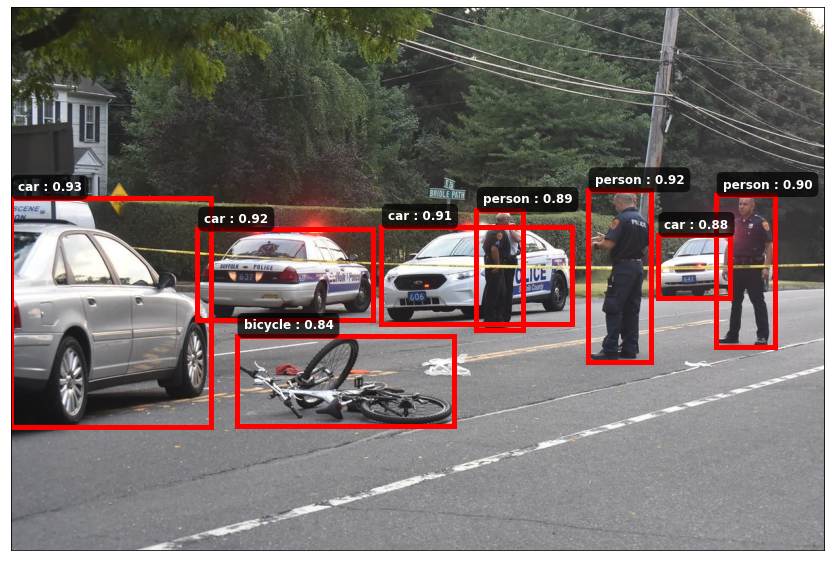

In [27]:
path = 'https://patch.com/img/cdn/users/5713/stock/raw/20150955e9d42773a42.jpg?width=1200'
predi(path)